# FIFA World Cup


<img src="Trophy.png">

## About Dataset

### Context

* The FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in the sport of football.

### Content

- Data Cleaning
- Visualization
- Most Number of World Cup Winning Title
- Number of Goal Per Countary
- Attendance, Number of Teams, Goals, and Matches per Cup
- Goals Per Team Per World Cup
- Matches With Heihest Number Of Attendance
- Stadium with Highest Average Attendance
- Which countries had won the cup ?
- Number of goal per country
- Match outcome by home and away temas

###  Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression as linreg
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBRegressor
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

### Reading the Datasets

In [2]:
WorldCupMatches=pd.read_csv('WorldCupMatches.csv')

In [3]:
WorldCupMatches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
WorldCupPlayers=pd.read_csv('WorldCupPlayers.csv')

In [5]:
WorldCupPlayers

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [6]:
WorldCups=pd.read_csv('WorldCups.csv')

In [7]:
WorldCups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


### Basic Details of Dataset

### Column Names
- It Showing name of columns present in datset

In [8]:
WorldCupMatches.columns 

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

### Shape of Data
- The shape of a datafFrame is dimensions that tells the number of rows and columns
of a given data frame.

In [9]:
WorldCupMatches.shape

(4572, 20)

### Top 5 Rows
- The head() function is used to get the first n rows.

In [10]:
WorldCupMatches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


### Bottom 5 Rows
- The tail() method returns a specified number of last rows.

In [11]:
 WorldCupMatches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding Null Values in the dataset
- Count NaN values under a single DataFrame column

In [12]:
WorldCupMatches.isna().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

### Filling / Replace null values
- The fillna() method replaces the NULL values with a specified value. 

In [13]:
WorldCupMatches['Year'].fillna('0',inplace=True)
WorldCupMatches['Datetime'].fillna('0',inplace=True)
WorldCupMatches['Stage'].fillna('0',inplace=True)
WorldCupMatches['Stadium'].fillna('0',inplace=True)
WorldCupMatches['City'].fillna('0',inplace=True)
WorldCupMatches['Home Team Name'].fillna('0',inplace=True)
WorldCupMatches['Home Team Goals'].fillna('0',inplace=True)
WorldCupMatches['Away Team Goals'].fillna('0',inplace=True)
WorldCupMatches['Away Team Name'].fillna('0',inplace=True)
WorldCupMatches['Win conditions'].fillna('0',inplace=True)
WorldCupMatches['Win conditions'].fillna('0',inplace=True)
WorldCupMatches['Half-time Home Goals'].fillna('0',inplace=True)
WorldCupMatches['Half-time Away Goals'].fillna('0',inplace=True)
WorldCupMatches['Attendance'].fillna('0',inplace=True)
WorldCupMatches['Referee'].fillna('0',inplace=True)
WorldCupMatches['Assistant 1'].fillna('no name',inplace=True)
WorldCupMatches['Assistant 2'].fillna('no name',inplace=True)
WorldCupMatches['RoundID'].fillna('0',inplace=True)
WorldCupMatches['MatchID'].fillna('0',inplace=True)
WorldCupMatches['Datetime'].fillna('0',inplace=True)
WorldCupMatches['Home Team Initials'].fillna('0',inplace=True)
WorldCupMatches['Away Team Initials'].fillna('0',inplace=True)

In [14]:
WorldCupMatches.isna().any()

Year                    False
Datetime                False
Stage                   False
Stadium                 False
City                    False
Home Team Name          False
Home Team Goals         False
Away Team Goals         False
Away Team Name          False
Win conditions          False
Attendance              False
Half-time Home Goals    False
Half-time Away Goals    False
Referee                 False
Assistant 1             False
Assistant 2             False
RoundID                 False
MatchID                 False
Home Team Initials      False
Away Team Initials      False
dtype: bool

### Total number of null values

In [15]:
WorldCupMatches.isna().sum().sum()

0

### Checking unique values in the Dataset
- The nunique() method returns the number of unique values for each column

In [16]:
WorldCupMatches.nunique()

Year                     21
Datetime                603
Stage                    24
Stadium                 182
City                    152
Home Team Name           79
Home Team Goals          12
Away Team Goals           8
Away Team Name           84
Win conditions           44
Attendance              623
Half-time Home Goals      8
Half-time Away Goals      7
Referee                 367
Assistant 1             388
Assistant 2             409
RoundID                 102
MatchID                 837
Home Team Initials       78
Away Team Initials       83
dtype: int64

In [17]:
WorldCups.nunique()

Year              20
Country           15
Winner             9
Runners-Up        10
Third             14
Fourth            16
GoalsScored       17
QualifiedTeams     5
MatchesPlayed      9
Attendance        20
dtype: int64

### Check the information about the Dataset
- The info() method prints information about the DataFrame.

In [18]:
WorldCupMatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  4572 non-null   object
 1   Datetime              4572 non-null   object
 2   Stage                 4572 non-null   object
 3   Stadium               4572 non-null   object
 4   City                  4572 non-null   object
 5   Home Team Name        4572 non-null   object
 6   Home Team Goals       4572 non-null   object
 7   Away Team Goals       4572 non-null   object
 8   Away Team Name        4572 non-null   object
 9   Win conditions        4572 non-null   object
 10  Attendance            4572 non-null   object
 11  Half-time Home Goals  4572 non-null   object
 12  Half-time Away Goals  4572 non-null   object
 13  Referee               4572 non-null   object
 14  Assistant 1           4572 non-null   object
 15  Assistant 2           4572 non-null   

### stastical information
- The describe() method returns description of the data in the DataFrame.

In [19]:
WorldCupMatches.describe()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
count,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572
unique,21,603,24,182,152,79,12,8,84,44,623,8,7,367,388,409,102,837,78,83
top,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no name,no name,0,0,0,0
freq,3720,3720,3720,3720,3720,3720,3720,3720,3720,3720,3722,3720,3720,3720,3720,3720,3720,3720,3720,3720


In [20]:
WorldCups.corr()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
Year,1.000000,0.829886,0.895565,0.972473
GoalsScored,0.829886,1.000000,0.866201,0.876201
QualifiedTeams,0.895565,0.866201,1.000000,0.949164
MatchesPlayed,0.972473,0.876201,0.949164,1.000000


### Observation

In [21]:
WorldCups['Winner'].value_counts()

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: Winner, dtype: int64

### Droping Columns
- The drop() method removes the specified row or column.

In [22]:
WorldCupMatches.drop(['Referee','Assistant 1','Assistant 2'],axis=1,inplace=True)

In [23]:
WorldCupMatches.columns 

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'RoundID', 'MatchID', 'Home Team Initials',
       'Away Team Initials'],
      dtype='object')

- Read the data after droping the unnecessary columns.

In [24]:
WorldCupMatches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Visual Analysis 

### Which countries had won the cup ?

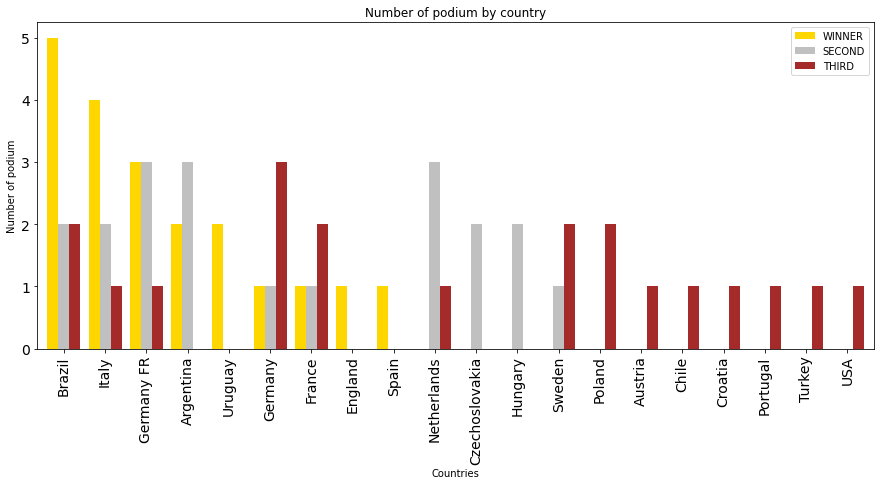

In [25]:
gold = WorldCups["Winner"]
silver = WorldCups["Runners-Up"]
bronze = WorldCups["Third"]

gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())
podium_count = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')
podium_count = podium_count.fillna(0)
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']
podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')
plt.show()

### Number of goal per country


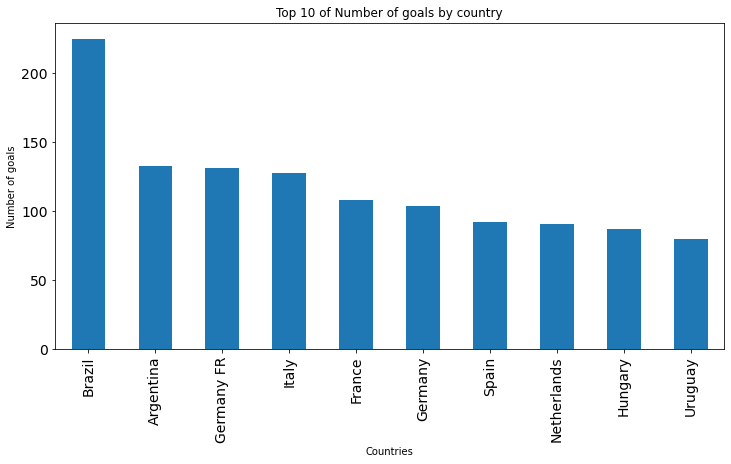

In [26]:
home = WorldCupMatches[['Home Team Name', 'Home Team Goals']].dropna()
away = WorldCupMatches[['Away Team Name', 'Away Team Goals']].dropna()

goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = goal_per_country.append(home.rename(index=str, columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))

goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", figsize=(12, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')
plt.show()

### Attendance, Number of Teams, Goals & Matchs Per Cup

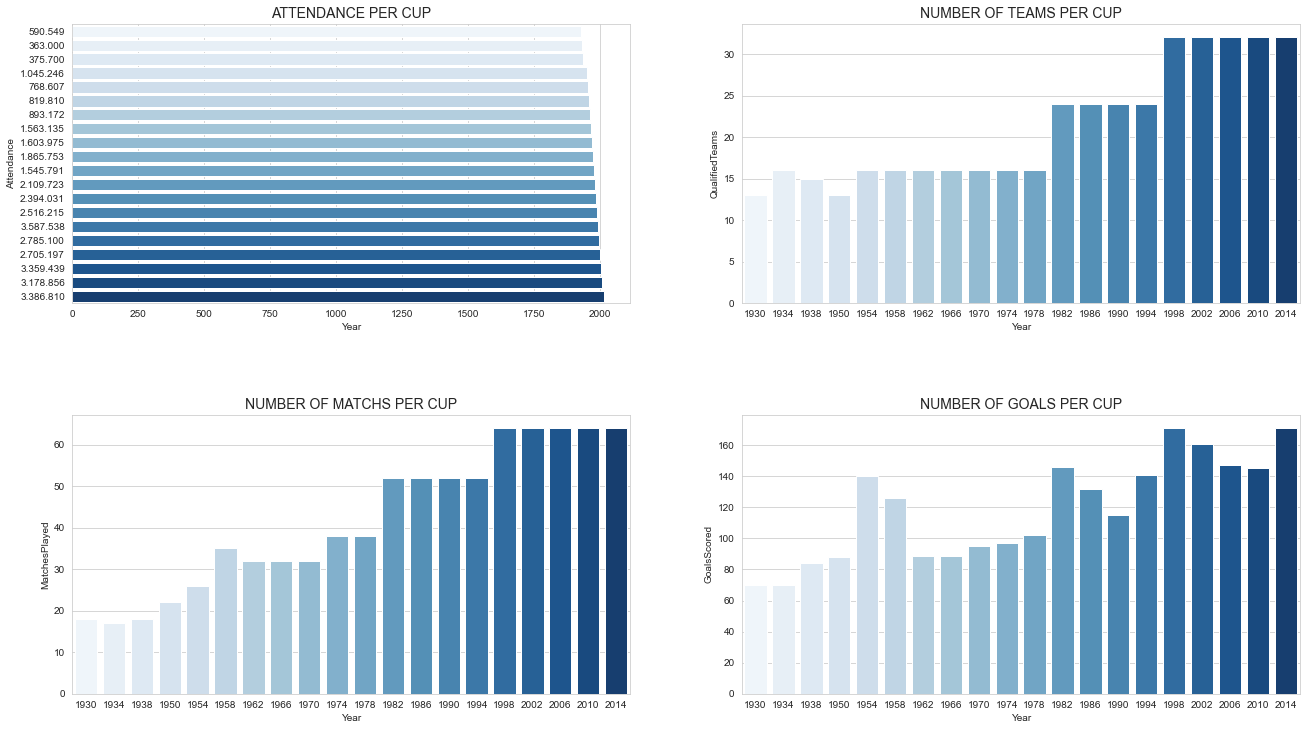

In [27]:
plt.figure(figsize = (22,12))
sns.set_style("whitegrid")
plt.subplot(221)
g1 = sns.barplot(x="Year", y="Attendance", data=WorldCups, palette="Blues")
g1.set_title("ATTENDANCE PER CUP", fontsize=14)

plt.subplot(222)
g2 = sns.barplot(x="Year", y="QualifiedTeams", data=WorldCups, palette="Blues")
g2.set_title("NUMBER OF TEAMS PER CUP", fontsize=14)

plt.subplot(223)
g2 = sns.barplot(x="Year", y="MatchesPlayed", data=WorldCups, palette="Blues")
g2.set_title("NUMBER OF MATCHS PER CUP", fontsize=14)

plt.subplot(224)
g2 = sns.barplot(x="Year", y="GoalsScored", data=WorldCups, palette="Blues")
g2.set_title("NUMBER OF GOALS PER CUP", fontsize=14)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

### Number of countries in the World Cup through years

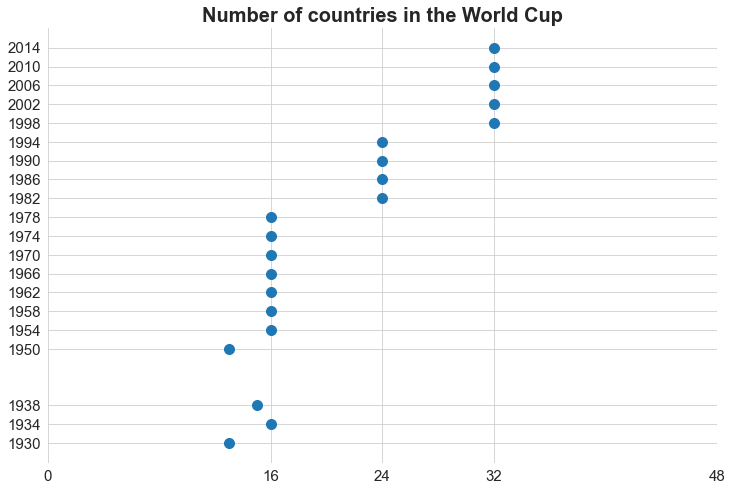

In [28]:
fig, ax= plt.subplots(figsize=(12,8))
plt.title('Number of countries in the World Cup',size=20,weight='bold')
WorldCups.plot.scatter(x='QualifiedTeams',y='Year',ax=ax,zorder=2,s=100)
ax.spines[['right', 'top', 'left','bottom']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.grid(visible=True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(WorldCups['Year'].tolist())
ax.set_xticks([0,16,24 ,32,48])
plt.tick_params(bottom=False, left=False)
plt.show()

### World Cup goals scored per year

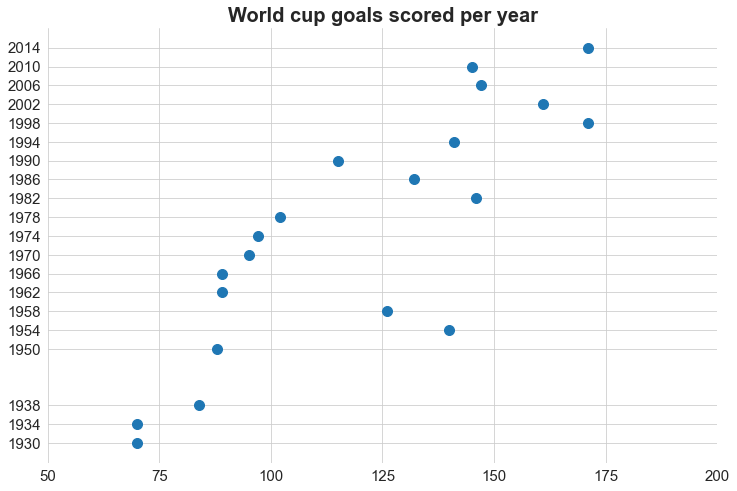

In [29]:
fig, ax= plt.subplots(figsize=(12,8))
plt.title('World cup goals scored per year',size=20,weight='bold')
WorldCups.plot.scatter(x='GoalsScored',y='Year',ax=ax,zorder=2,s=100)
ax.spines[['right', 'top', 'left','bottom']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.grid(visible=True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(WorldCups['Year'].tolist())
ax.set_xticks([50,75,100,125,150,175,200])
plt.tick_params(bottom=False, left=False)
plt.show()

### World Cup Champions

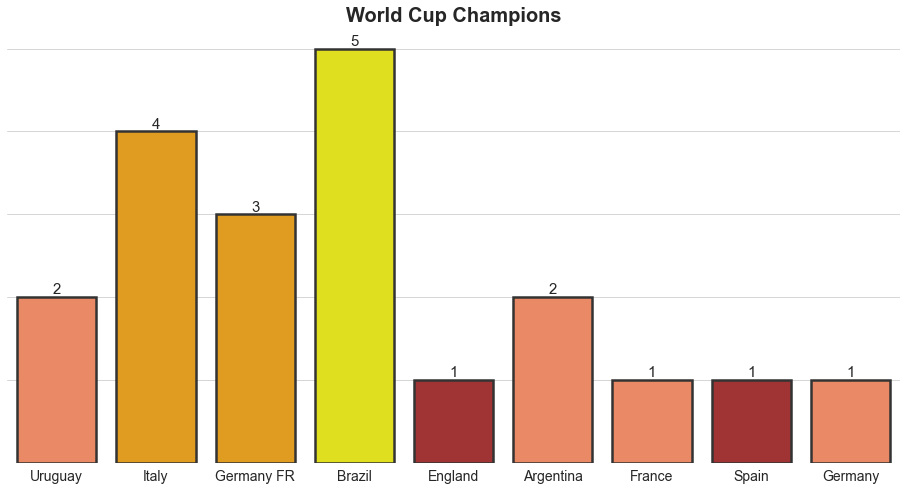

In [30]:
palette=['coral','orange','orange','yellow','firebrick','coral','coral','firebrick']
fig, ax= plt.subplots(figsize=(16,8))

plt.title('World Cup Champions',size=20,weight='bold')
sns.countplot(x = WorldCups['Winner'], palette=palette,linewidth=2.5, edgecolor=".2")
ax.spines[['right', 'top', 'left','bottom']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.tick_params(labelleft=False, left=False,labelsize=14)

for i in ax.containers:
    ax.bar_label(i,fontsize=15);
plt.show()

### The relation between Years & Goals Scored

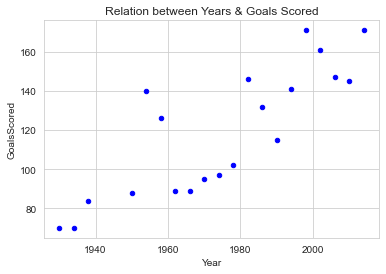

In [31]:
WorldCups.plot(kind='scatter',x='Year',y='GoalsScored',color='b')
plt.title("Relation between Years & Goals Scored")
plt.show()

In [32]:
Count_winners=pd.Series(WorldCups['Winner'].replace("Germany FR","Germany").value_counts())
Count_winners

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

### Bar plot for count of winners

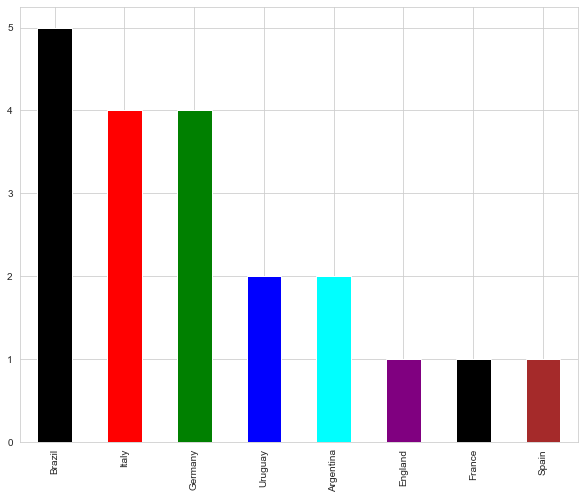

In [33]:
Count_winners.plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan','purple','black','brown'],figsize=(10,8))
plt.show()

### Find the sum of all titles

In [34]:
sum_titles=pd.Series(Count_winners).sum()
sum_titles

20

### Calculate percentage for every team winning

In [35]:
percent=pd.Series(Count_winners)/sum_titles
percent

Brazil       0.25
Italy        0.20
Germany      0.20
Uruguay      0.10
Argentina    0.10
England      0.05
France       0.05
Spain        0.05
Name: Winner, dtype: float64

### Draw pie chart for every percentage

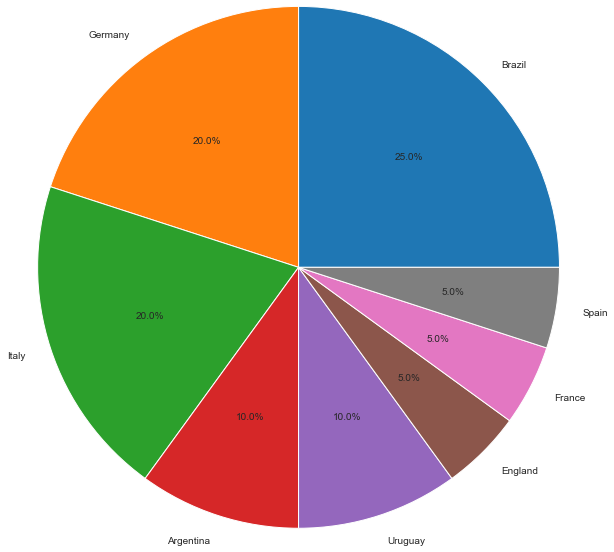

In [36]:
def func(pct, allvalues):
    absolute = int(pct / 100.*sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
labels=['Brazil','Germany','Italy','Argentina','Uruguay','England','France','Spain']
plt.pie(percent,labels=labels,radius=3,autopct = lambda pct: func(pct, percent))
#plt.legend(loc='right')
plt.show()

# Machine Learning 
- Machine Learning is a subset of Artificial Intelligence. ML is the study of computer algorithms that improve automatically through experience. ML explores the study and construction of algorithms that can learn from data and make predictions on data. Based on more data, machine learning can change actions and responses which will make it more efficient, adaptable, and scalable.

<img src ="Machine Learning Photo.png"> 

### Supervised Learning
- Develop predective model based on both input and output data.

### Regression Analysis
- Regression is a technique for investigating the relationship between independent variables or features and a dependent variable or outcome. It's used as a method for predictive modelling in machine learning, in which an algorithm is used to predict continuous outcomes.

### Show description/info of the data set

### Convert the categorical columns to numerical columns

In [37]:
WorldCups.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

In [38]:
WorldCups.dtypes

Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance        object
dtype: object

In [39]:
le = LabelEncoder()

In [40]:
WorldCups.Attendance = le.fit_transform(WorldCups.Attendance)

### Using a regression model, spliting the data into train and test portions

### Test-Train Split
- Train the Model

In [41]:
x=WorldCups.drop(['Year','Country','Winner','Runners-Up','Third','Fourth','MatchesPlayed' ],axis=1)

In [42]:
x

,GoalsScored,QualifiedTeams,Attendance
0,70,13,16
1,70,16,14
2,84,15,15
3,88,13,0
4,140,16,17
5,126,16,18
6,89,16,19
7,89,16,2
8,95,16,3
9,97,16,4


In [43]:
y=WorldCups['MatchesPlayed']

In [44]:
y

0     18
1     17
2     18
3     22
4     26
5     35
6     32
7     32
8     32
9     38
10    38
11    52
12    52
13    52
14    52
15    64
16    64
17    64
18    64
19    64
Name: MatchesPlayed, dtype: int64

In [45]:
x_train, x_test, y_train, y_test = tts(x,y, train_size=.8, test_size=.2,random_state= 1)

## 1. Linear Regression

### Fit the data into to the regression model

In [46]:
lm = linreg()
lm.fit(x_train, y_train)
y_prediction = lm.predict(x_test)
y_prediction

array([30.1200145 , 67.21829217, 21.5089085 , 36.56765152])

In [47]:
lm.score(x_train,y_train)*100

95.32944666987989

In [48]:
lm.score(x_test,y_test)*100

80.45574036333798

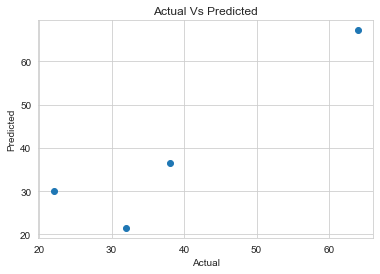

In [49]:
plt.scatter(y_test,y_prediction)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual Vs Predicted")
plt.show()

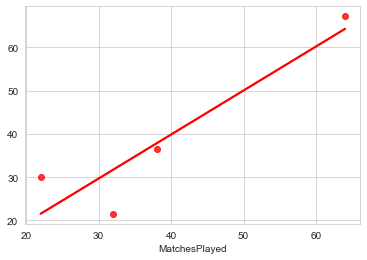

In [50]:
sns.regplot(x=y_test,y=y_prediction,ci=None,color ='red');

## 2.Decision Tree

In [51]:
model_dt=DecisionTreeRegressor()

In [52]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [53]:
model_dt.score(x_train,y_train)*100

100.0

In [54]:
model_dt.score(x_test,y_test)*100

89.62655601659752

### 3. Random Forest

In [55]:
model_rf=RandomForestRegressor()

In [56]:
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
model_rf.score(x_train,y_train)*100

98.52959179265659

In [58]:
model_rf.score(x_test,y_test)*100

94.15809128630706

### 4. Support Vector Machine (SVM)

In [59]:
model_sv=SVR()

In [60]:
model_sv.fit(x_train,y_train)

SVR()

In [61]:
model_sv.score(x_train,y_train)*100

17.77974360833423

In [62]:
model_sv.score(x_test,y_test)*100

13.069787030312119

### Observation
- By Doing Analysis it is Observed that Brazil has won the title 5 times, Italy and Germany have won   the titles 4 times.
- In Analysis it also observed that Brazil has Highest number of goal country.
- In Machine Learning doing regression analysis
- 1) Linear Regression accuracy of model is observed = 80.45%
- 2) Decision Tree accuracy of model is observed = 89.62%
- 3) Random Forest accuracy of model is observed = 94.15%
- 4) Support Vector Machine (SVM) accuracy of model is observed =13.06%



### Conclusion

- From comparing the 4 models, we can conclude that Model 3: Random Forest yields the highest accuracy. With an accuracy of 94.15 %

### Future Research Ideas
- Identificate which factor is more correlated with a high average attendance in World Cups;
- Identificate if the World Cup is critical on the decision of who is the best players of the World;
- Does the teams performs better at home than out of home in World Cups?

<img src ="Thank you image.png">